<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0__1)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-1'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n120-1.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,0.467056,181.738521,180.978589,0.759932
1,0.0,1.0,84.811384,90.263394,48.152488,0.032898,233.260165,233.468110,-0.207946
2,0.0,2.0,85.367006,79.971966,30.234286,0.211417,205.784676,205.655050,0.129626
3,0.0,3.0,77.359299,99.361088,30.715902,0.051285,217.487574,217.675756,-0.188182
4,0.0,4.0,66.172252,77.690898,81.326401,0.111355,235.300906,235.426081,-0.125175
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,0.254671,191.517244,191.146497,0.370748
119996,999.0,116.0,59.821851,70.493625,39.142519,-0.715809,178.742186,179.331471,-0.589285
119997,999.0,117.0,27.825940,21.812149,86.626142,1.597295,147.861526,146.320340,1.541187
119998,999.0,118.0,98.429329,29.603075,35.081782,0.792779,173.906965,172.911558,0.995407


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    97.314689  26.811758  47.145018  ...  181.738521  180.978589  0.759932
      1.0    84.811384  90.263394  48.152488  ...  233.260165  233.468110 -0.207946
      2.0    85.367006  79.971966  30.234286  ...  205.784676  205.655050  0.129626
      3.0    77.359299  99.361088  30.715902  ...  217.487574  217.675756 -0.188182
      4.0    66.172252  77.690898  81.326401  ...  235.300906  235.426081 -0.125175
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  74.209446  68.505229  38.547898  ...  191.517244  191.146497  0.370748
      116.0  59.821851  70.493625  39.142519  ...  178.742186  179.331471 -0.589285
      117.0  27.825940  21.812149  86.626142  ...  147.861526  146.320340  1.541187
      118.0  98.429329  29.603075  35.081782  ...  173.906965  172.911558  0.995407
      119.0  48.220330  29.617922  33.572581  ...  121.486095  121.128957  0.357138

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    97.314689  26.811758  47.145018  ...  181.738521  180.978589  0.759932
      1.0    84.811384  90.263394  48.152488  ...  233.260165  233.468110 -0.207946
      2.0    85.367006  79.971966  30.234286  ...  205.784676  205.655050  0.129626
      3.0    77.359299  99.361088  30.715902  ...  217.487574  217.675756 -0.188182
      4.0    66.172252  77.690898  81.326401  ...  235.300906  235.426081 -0.125175
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  74.209446  68.505229  38.547898  ...  191.517244  191.146497  0.370748
      116.0  59.821851  70.493625  39.142519  ...  178.742186  179.331471 -0.589285
      117.0  27.825940  21.812149  86.626142  ...  147.861526  146.320340  1.541187
      118.0  98.429329  29.603075  35.081782  ...  173.906965  172.911558  0.995407
      119.0  48.220330  29.617922  33.572581  ...  121.486095  121.128957  0.357138

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,0.467056,181.738521,180.978589,0.759932
1,0.0,1.0,84.811384,90.263394,48.152488,0.032898,233.260165,233.468110,-0.207946
2,0.0,2.0,85.367006,79.971966,30.234286,0.211417,205.784676,205.655050,0.129626
3,0.0,3.0,77.359299,99.361088,30.715902,0.051285,217.487574,217.675756,-0.188182
4,0.0,4.0,66.172252,77.690898,81.326401,0.111355,235.300906,235.426081,-0.125175
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,0.254671,191.517244,191.146497,0.370748
119996,999.0,116.0,59.821851,70.493625,39.142519,-0.715809,178.742186,179.331471,-0.589285
119997,999.0,117.0,27.825940,21.812149,86.626142,1.597295,147.861526,146.320340,1.541187
119998,999.0,118.0,98.429329,29.603075,35.081782,0.792779,173.906965,172.911558,0.995407


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    97.314689  26.811758  47.145018  ...  181.738521  180.978589  0.759932
      1.0    84.811384  90.263394  48.152488  ...  233.260165  233.468110 -0.207946
      2.0    85.367006  79.971966  30.234286  ...  205.784676  205.655050  0.129626
      3.0    77.359299  99.361088  30.715902  ...  217.487574  217.675756 -0.188182
      4.0    66.172252  77.690898  81.326401  ...  235.300906  235.426081 -0.125175
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  74.209446  68.505229  38.547898  ...  191.517244  191.146497  0.370748
      116.0  59.821851  70.493625  39.142519  ...  178.742186  179.331471 -0.589285
      117.0  27.825940  21.812149  86.626142  ...  147.861526  146.320340  1.541187
      118.0  98.429329  29.603075  35.081782  ...  173.906965  172.911558  0.995407
      119.0  48.220330  29.617922  33.572581  ...  121.486095  121.128957  0.357138

[120000 rows x 7 columns]

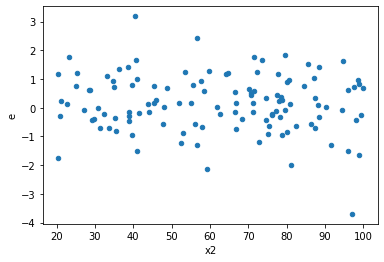

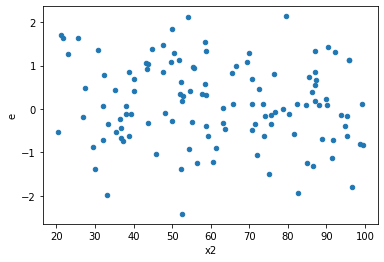

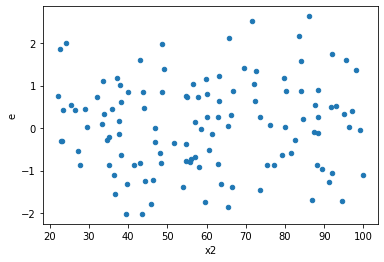

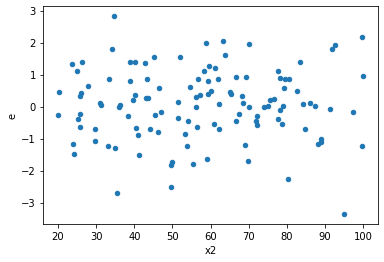

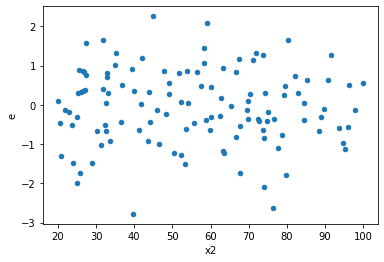

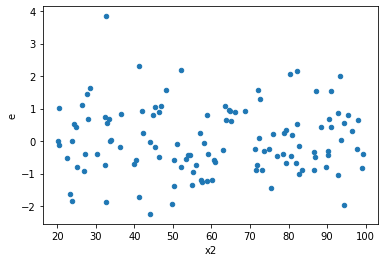

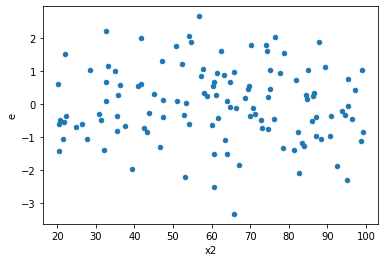

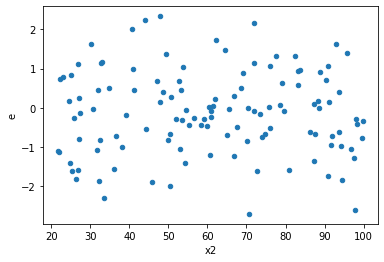

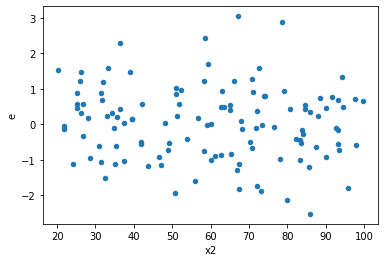

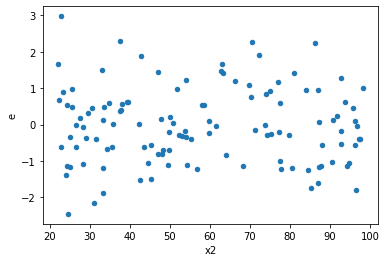

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,59.0,55.0,49.450496771429194,49.29759374117148,0.838144013075071,0.8963198862031179,1.0694103545697415,0.8034922095758386,0.5982538952120807,0.4017461047879193,Reject005=1 : Homoscedasticity
1.0,56.0,58.0,48.12016796854059,59.65893515451573,0.8592887137239391,1.0286023302502711,1.1970392649434085,0.4982137410102958,0.7508931294948521,0.2491068705051479,Reject005=1 : Homoscedasticity
3.0,63.0,51.0,55.794869636966965,49.751716382451995,0.885632851380428,0.9755238506363136,1.1014991699051964,0.7253966994647512,0.6373016502676244,0.3626983497323756,Reject005=1 : Homoscedasticity
5.0,54.0,60.0,46.261696434808655,63.344884787756094,0.8566980821260862,1.0557480797959349,1.2323455623664548,0.42981911190844535,0.7850904440457773,0.21490955595422268,Reject005=1 : Homoscedasticity
8.0,59.0,55.0,36.59914949016779,49.89899570466216,0.6203245676299626,0.9072544673574938,1.462548018731206,0.1563341870658259,0.921832906467087,0.07816709353291296,Reject005=1 : Homoscedasticity
9.0,69.0,45.0,62.289817668357536,42.915517488576,0.9027509807008338,0.9536781664128,1.0564133263775908,0.8554624953306278,0.5722687523346861,0.4277312476653139,Reject005=1 : Homoscedasticity
10.0,50.0,64.0,48.18601556856676,64.72168145924569,0.9637203113713352,1.0112762728007139,1.049346227186712,0.8486979407409116,0.5756510296295442,0.4243489703704558,Reject005=1 : Homoscedasticity
11.0,57.0,57.0,45.43510509944199,48.210985343279326,0.7971071070077542,0.8458067604084092,1.0610954951630875,0.8236415735242066,0.5881792132378967,0.4118207867621033,Reject005=1 : Homoscedasticity
12.0,45.0,69.0,41.636518168691296,83.29643660318983,0.925255959304251,1.2071947333795627,1.3047143563250503,0.31536739933246594,0.842316300333767,0.15768369966623297,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,59.0,55.0,49.450496771429194,49.29759374117148,0.838144013075071,0.8963198862031179,1.0694103545697415,0.8034922095758386,Reject005=1 : Homoscedasticity
1.0,56.0,58.0,48.12016796854059,59.65893515451573,0.8592887137239391,1.0286023302502711,1.1970392649434085,0.4982137410102958,Reject005=1 : Homoscedasticity
2.0,60.0,54.0,63.58437134488785,43.170312470045474,1.0597395224147974,0.799450230926768,0.7543837084655333,0.2876085935717166,Reject005=1 : Homoscedasticity
3.0,63.0,51.0,55.794869636966965,49.751716382451995,0.885632851380428,0.9755238506363136,1.1014991699051964,0.7253966994647512,Reject005=1 : Homoscedasticity
4.0,47.0,67.0,44.410996723975856,52.75953660343724,0.9449148239143799,0.7874557702005558,0.8333616430510231,0.5126896658292639,Reject005=1 : Homoscedasticity
5.0,54.0,60.0,46.261696434808655,63.344884787756094,0.8566980821260862,1.0557480797959349,1.2323455623664548,0.42981911190844535,Reject005=1 : Homoscedasticity
6.0,66.0,48.0,64.59846020693469,38.884216157534055,0.9787645485899196,0.8100878366152928,0.827663647791867,0.4720867540653097,Reject005=1 : Homoscedasticity
7.0,55.0,59.0,73.46473332857549,49.948772271026414,1.335722424155918,0.8465893605258714,0.6338063546854474,0.08951936786856357,Reject005=1 : Homoscedasticity
8.0,59.0,55.0,36.59914949016779,49.89899570466216,0.6203245676299626,0.9072544673574938,1.462548018731206,0.1563341870658259,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      937
Reject005=0 : Heteroscedasticity     63
Name: Result_test, dtype: int64